April 4th, 2025

## Joon's THEMIS data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
import matplotlib.patheffects as mpe

In [3]:
data = scipy.io.readsav("data/joon/THEMIS_SHARE.sav", verbose=True, python_dict=True)

--------------------------------------------------
Date: Fri Apr  4 09:55:31 2025
User: mjkim210
Host: scc-tr1
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: linux
IDL Version: 8.7.2
--------------------------------------------------
Successfully read 8 records of which:
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
 - 5 are of type VARIABLE
--------------------------------------------------
Available variables:
 - occ_rate [<class 'numpy.ndarray'>]
 - nc [<class 'numpy.ndarray'>]
 - lb_intensity [<class 'numpy.ndarray'>]
 - beta_bin [<class 'numpy.ndarray'>]
 - t_bin [<class 'numpy.ndarray'>]
--------------------------------------------------


Occ_rate: Occurrence rate of lower band chorus wave

Nc: Low-energy plasma concectration (0 to 1)

Lb_intensity: wave amplidues in pT

BETA_BIN: an evenly spaced beta in log space for plot

T_BIN: an evenly spaced Tratio in log space for plot

In [4]:
def get_S(nc_n0):
    return 0.206 - 0.107*nc_n0 - 0.0326*(nc_n0**2)

def get_alpha(nc_n0):
    return 0.574 + 0.178*nc_n0 - 0.198*(nc_n0**2)

def get_T_ratio(nc_n0, beta_par):
    alpha = get_alpha(nc_n0=nc_n0)
    S = get_S(nc_n0=nc_n0)
    return 1+ S/(beta_par**alpha)

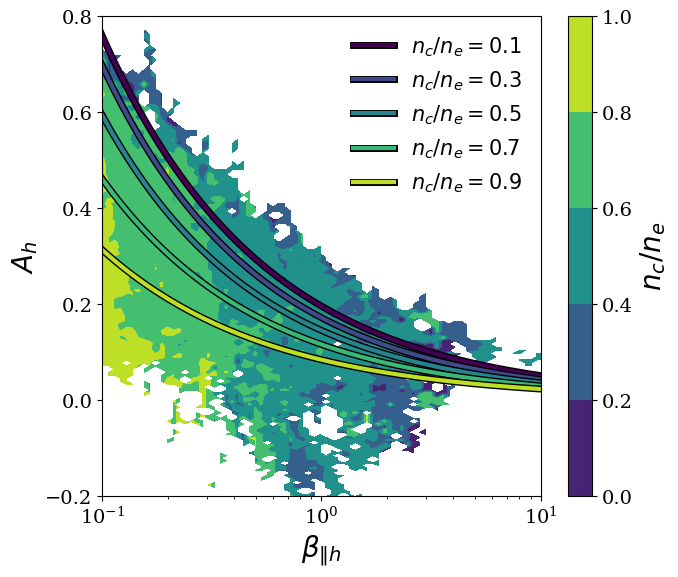

In [5]:
fig, ax = plt.subplots(figsize=(7, 6))
pos = ax.contourf(data["beta_bin"], data["t_bin"]-1, data["nc"], cmap="viridis", levels=5)

cmap = plt.get_cmap('viridis')
# Get an array of colors from the colormap
colors = cmap(np.linspace(0, 0.9, 5))
outline=mpe.withStroke(linewidth=5, foreground='black')

ax.plot(data["beta_bin"], get_T_ratio(nc_n0=0.1, beta_par=data["beta_bin"])-1, path_effects=[outline], linewidth=3, color=colors[0], label=r"$n_{c}/n_{e} = 0.1$")
ax.plot(data["beta_bin"], get_T_ratio(nc_n0=0.3, beta_par=data["beta_bin"])-1, path_effects=[outline], linewidth=3, color=colors[1], label=r"$n_{c}/n_{e} = 0.3$")
ax.plot(data["beta_bin"], get_T_ratio(nc_n0=0.5, beta_par=data["beta_bin"])-1, path_effects=[outline], linewidth=3, color=colors[2], label=r"$n_{c}/n_{e} = 0.5$")
ax.plot(data["beta_bin"], get_T_ratio(nc_n0=0.7, beta_par=data["beta_bin"])-1, path_effects=[outline], linewidth=3, color=colors[3], label=r"$n_{c}/n_{e} = 0.7$")
ax.plot(data["beta_bin"], get_T_ratio(nc_n0=0.9, beta_par=data["beta_bin"])-1, path_effects=[outline], linewidth=3, color=colors[4], label=r"$n_{c}/n_{e} = 0.9$")


ax.set_xscale("log")
ax.set_ylim(-0.2, 0.8)
ax.set_xlim(1e-1, 10)
#ax.set_ylim(0.9, 2.5)

#ax.set_yticks([1, 1.5, 2, 2.5])
#ax.set_yticklabels([1, 1.5, 2, 2.5])
ax.set_xlabel(r"$\beta_{\|h}$", fontsize=20)
ax.set_ylabel(r"$A_{h}$", fontsize=20)

legend = ax.legend(ncols=1, fontsize=15, loc='upper right')
legend.get_frame().set_alpha(0)

cbar = fig.colorbar(pos)
cbar.ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_label(r"$n_{c}/n_{e}$", fontsize=20)
#ax.set_title("$n_{c}/n_{0}$")
plt.tight_layout()
plt.savefig("figs/joon/nc_n0.png", dpi=300)

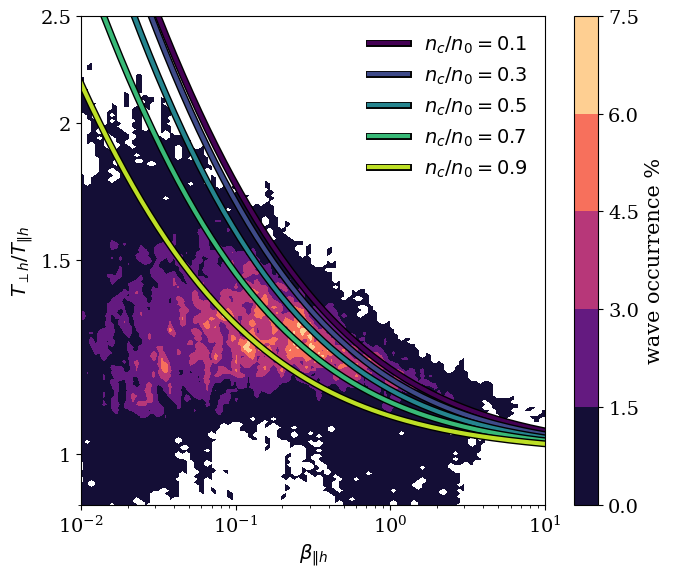

In [46]:
fig, ax = plt.subplots(figsize=(7, 6))
pos = ax.contourf(data["beta_bin"], data["t_bin"], data["occ_rate"]*100, cmap="magma", levels=5)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-2, 10)
ax.set_ylim(0.9, 2.5)

ax.plot(data["beta_bin"], get_T_ratio(nc_n0=0.1, beta_par=data["beta_bin"]), path_effects=[outline], linewidth=3, color=colors[0], label=r"$n_{c}/n_{0} = 0.1$")
ax.plot(data["beta_bin"], get_T_ratio(nc_n0=0.3, beta_par=data["beta_bin"]), path_effects=[outline], linewidth=3, color=colors[1], label=r"$n_{c}/n_{0} = 0.3$")
ax.plot(data["beta_bin"], get_T_ratio(nc_n0=0.5, beta_par=data["beta_bin"]), path_effects=[outline], linewidth=3, color=colors[2], label=r"$n_{c}/n_{0} = 0.5$")
ax.plot(data["beta_bin"], get_T_ratio(nc_n0=0.7, beta_par=data["beta_bin"]), path_effects=[outline], linewidth=3, color=colors[3], label=r"$n_{c}/n_{0} = 0.7$")
ax.plot(data["beta_bin"], get_T_ratio(nc_n0=0.9, beta_par=data["beta_bin"]), path_effects=[outline], linewidth=3, color=colors[4], label=r"$n_{c}/n_{0} = 0.9$")

legend = ax.legend(ncols=1, fontsize=14, loc='upper right')
legend.get_frame().set_alpha(0)

ax.set_yticks([1, 1.5, 2, 2.5])
ax.set_yticklabels([1, 1.5, 2, 2.5])
ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$T_{\perp h}/T_{\| h}$")

cbar = fig.colorbar(pos)
cbar.set_label("wave occurrence %", fontsize=15)
#ax.set_title("wave occurrence %")
plt.tight_layout()
plt.savefig("figs/joon/wave_occurrence.png", dpi=300)

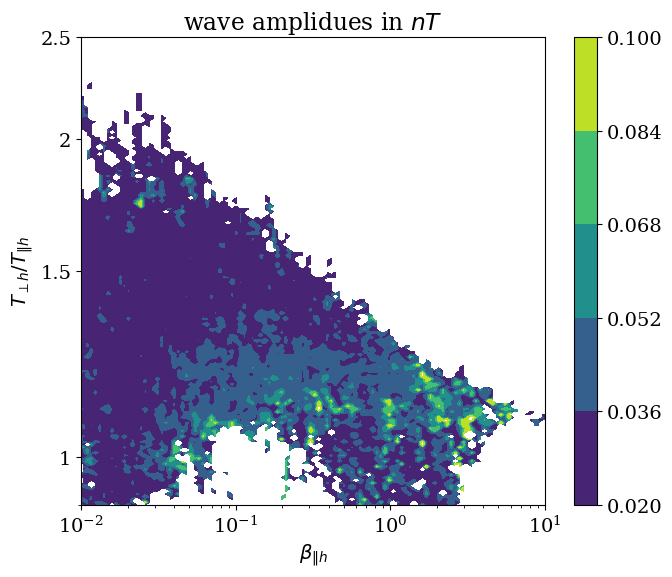

In [7]:
fig, ax = plt.subplots(figsize=(7, 6))

levels = np.linspace(0.2, 1.0, 6)*0.1
pos = ax.contourf(data["beta_bin"], data["t_bin"], data["lb_intensity"]*0.001, cmap="viridis", levels=levels)
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel(r"$\beta_{\|h}$")
ax.set_ylabel(r"$T_{\perp h}/T_{\| h}$")

ax.set_xlim(1e-2, 10)
ax.set_yticks([1, 1.5, 2, 2.5])
ax.set_yticklabels([1, 1.5, 2, 2.5])
ax.set_ylim(0.9, 2.5)

cbar = fig.colorbar(pos)
ax.set_title("wave amplidues in $nT$")
plt.tight_layout()
plt.savefig("figs/joon/wave_amplitude.png", dpi=300)

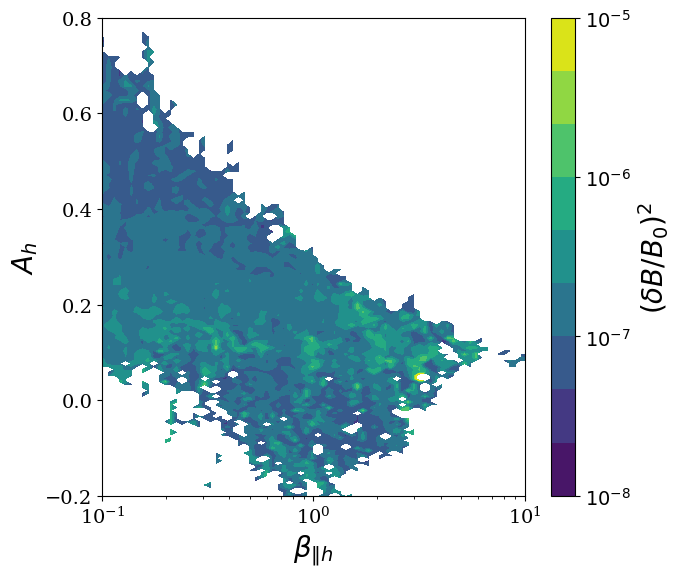

In [6]:
fig, ax = plt.subplots(figsize=(7, 6))

B0 = 100
levels = np.linspace(-8, -5, 10)
pos = ax.contourf(data["beta_bin"], data["t_bin"]-1, np.log10(((data["lb_intensity"]*0.001)**2)/(B0**2)), cmap="viridis", levels=levels)

ax.set_xscale("log")
ax.set_xlim(1e-1, 10)
ax.set_ylim(-0.2, 0.8)
ax.set_xlabel(r"$\beta_{\|h}$", fontsize=20)
ax.set_ylabel(r"$A_{h}$", fontsize=20)

cbar = fig.colorbar(pos, ticks=[-5, -6, -7, -8])
cbar.ax.set_yticklabels(['$10^{-5}$', '$10^{-6}$', '$10^{-7}$', '$10^{-8}$']) 
cbar.set_label(r"$(\delta B/B_{0})^2$", fontsize=20)
#ax.set_title("$B_{w}^2$ in  $(nT)^2$")
plt.tight_layout()
plt.savefig("figs/joon/wave_amplitude2.png", dpi=300)